## Install Python 3.8

See [stackoverflow](https://stackoverflow.com/a/70993829)

In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh

!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh

!bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
!conda install python=3.8

In [3]:
!python --version

Python 3.8.2


## Install forceatlas2

In [ ]:
!git clone https://github.com/AbdelRayan/AutomaticSleepScoring/tree/main/Geoffroy_Camille/FurtherAnalysis/forceatlas2/fa2

In [ ]:
%cd forceatlas2
%ls -lrth

In [ ]:
!pip install . --user

In [7]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

G = nx.random_geometric_graph(400, 0.2)

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

# positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

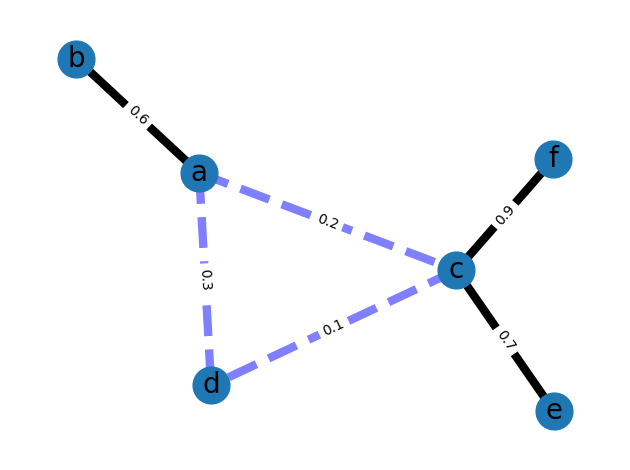

In [9]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

#Libraries

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from scipy.io import loadmat
from matplotlib import colors as mcolors

#Loading Data

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [12]:
file_path = '/content/drive/My Drive/Donders/OS_Basic_RGS14/model_geoff/all_AWNTR_in_order'

In [13]:
latent_states = np.load(file_path + '/latentStates.npz')
unique_states = np.load(file_path + '/uniqueStates.npz')
obs_keys = np.load(file_path + '/obsKeys.npz')

In [14]:
inferredStates = latent_states['inferredStates']
uniqueStates = unique_states['uniqueStates']
obsKeys = obs_keys['obsKeys']

manualStates = inferredStates[:, 1]
latentStates = inferredStates[:, 0]

nLS = uniqueStates.shape[0]
LS = [f"LS-{i+1}" for i in range(nLS)]

In [15]:
inferredStates.shape, uniqueStates.shape, manualStates.shape, latentStates.shape, obsKeys.shape

((608100, 2), (102, 23), (608100,), (608100,), (608100, 5))

In [52]:
#We take the length of each posttrial in their order of apparition in the input files for the mcRBM algorithm
len_posttrials = np.array([1338, 1351, 1339, 1367, 5080, 1359, 1350, 1382, 1337, 5370, 1341, 1338, 1342, 1343, 5138, 1349, 1341, 1394, 1369, 5410, 1187, 1375, 1466, 5093, 1395, 1343, 1346, 1347, 5453, 1346, 1346, 1346, 1346, 5460, 1346, 1346, 1350, 1346, 5267, 1347, 1346, 1346, 1346, 5118, 1347, 1346, 1346, 1347, 5397, 1347, 1348, 1346, 1346, 5400, 1346, 1348, 1346, 1346, 5405, 1346, 1346, 1346, 1346, 5402, 1346, 1346, 1348, 5399, 1346, 1347, 1360, 1361, 5366, 1346, 1346, 1346, 1346, 5403, 302, 1346, 1346, 1346, 5387, 1346, 1346, 1346, 1346, 5377, 1346, 1346, 1346, 1346, 5411, 1346, 1136, 1346, 1346, 5413, 1346, 1346, 1348, 1346, 4805, 1346, 1346, 1346, 1346, 5453, 1346, 1346, 1346, 1346, 5396, 1347, 1346, 1347, 1346, 5396, 1346, 1346, 1346, 1349, 5397, 1346, 1346, 1348, 1346, 5398, 1346, 1346, 1346, 1346, 4455, 1346, 1346, 1346, 1346, 5104, 1346, 1346, 1346, 5396, 1346, 1346, 1346, 1346, 1346, 1346, 1346, 1346, 5396, 1346, 1346, 1346, 1350, 5170, 1346, 1346, 1346, 1346, 5396, 1346, 1346, 1346, 1346, 5396, 1346, 1235, 1349, 1346, 5412, 1346, 1362, 1355, 1346, 5396, 1346, 1346, 1346, 1346, 5396, 1347, 1347, 1346, 1347, 5396, 958, 1346, 1346, 1346, 5396, 1349, 1346, 1346, 1346, 5399, 1346, 1347, 1354, 1346, 5398, 1346, 1361, 1352, 1421, 5415, 1345, 1347, 1346, 1351, 5408, 1345, 1465, 1346, 1355, 5396, 1345, 1346, 1405, 1345, 5396, 1346, 1346, 1346, 1372, 5375, 1346, 1346, 1346, 1345, 5036, 1346, 1345, 1346, 1346, 5396, 1345, 1465, 1345, 1346, 5396, 1346, 1350, 1364, 1346, 5396, 1579, 1346, 1346, 1378, 5231, 1345, 1345, 1346, 1345, 2502, 1345, 1345, 1343, 1346, 5405, 1345, 1345, 1345, 1345, 5002, 1346, 1346, 1347, 1346, 5396, 1366, 1366, 1346, 1352, 5394, 1346, 1345, 1345, 1345, 5395, 1345, 1346, 1346, 1345, 5396])
index_end_posttrials = np.empty(np.shape(len_posttrials))
len_tot = 0
for i in range(len(index_end_posttrials)):
  len_tot += len_posttrials[i]
  index_end_posttrials[i] = len_tot - 1

In [42]:
cmap = cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'white', 'red'])

#Network modelling

A state-transition graph in which nodes have been clustered according to the transition probabilities. Nodes correspond to the substages, and edges identify the transitions between stages. Nodes’ size is related to their in-degree. Blue, green, and red nodes are associated with substages mapping with high probability to wakefulness, NREM sleep, and REM sleep, respectively. Purple nodes correspond to substages that do not have a clear mapping to 1 of the 3 known stages (probability lower than 0.6 for any stage). Edges’ weight is related to the corresponding transition probability, and their color is related to the source node.

See [graph](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.2003663).

See [networkx examples](https://networkx.org/documentation/stable/auto_examples/index.html).

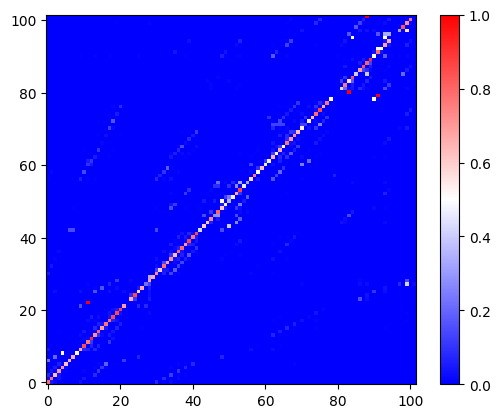

In [53]:
# Example list of transitions between states
# Transitions = [‘A’, ‘B’, ‘B’, ‘C’, ‘B’, ‘A’, ‘D’, ‘D’, ‘A’, ‘B’, ‘A’, ‘D’]
# Function to calculate the transition matrix
def transition_matrix(transitions):
    # Identify the unique states
    states = sorted(set(transitions))
    # Create a dictionary to map states to indices
    state_indices = {state: i for i, state in enumerate(states)}
    # Initialize the transition matrix with zeros
    num_states = len(states)
    M = np.zeros((num_states, num_states))
    # Populate the transition counts
    for n, (i, j) in enumerate(zip(transitions, transitions[1:])):
        #We exclude the transitions between the end of a posttrial
        #and the beginning of the next posttrial
        if n not in index_end_posttrials:
            M[state_indices[i]][state_indices[j]] += 1
    # Convert counts to probabilities
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

# Calculate the transition matrix
M = transition_matrix(latentStates)

plt.imshow(M, origin='lower', cmap = cmap)
plt.colorbar()


In [54]:
# colors = ['red is rem', '', 'blue is wake']

node_colors = []

for i in uniqueStates[:, 0]:

    idx = np.where(obsKeys[:, 1] == i )[0]
    latent_frames = obsKeys[idx, :]

    awake_pct = round((len(np.where((latent_frames[:,3]==1))[0])/float(len(latent_frames))),3)
    nrem_pct = round((len(np.where((latent_frames[:,3]==3))[0])/float(len(latent_frames))),3)
    rem_pct = round((len(np.where((latent_frames[:,3]==5))[0])/float(len(latent_frames))),3)

    if nrem_pct > awake_pct and nrem_pct > rem_pct: # nrem is green
        node_colors.append("green")
    elif awake_pct > nrem_pct and awake_pct > rem_pct: # awake is blue
        node_colors.append("blue")
    elif rem_pct > nrem_pct and rem_pct > awake_pct: #rem is purple
        node_colors.append("purple")
    else:
      node_colors.append("grey")

In [55]:
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:22<00:00, 90.29it/s]

BarnesHut Approximation  took  2.26  seconds
Repulsion forces  took  15.42  seconds
Gravitational forces  took  0.27  seconds
Attraction forces  took  2.89  seconds
AdjustSpeedAndApplyForces step  took  0.73  seconds


In [56]:
in_degrees = dict(G.degree())

#Results

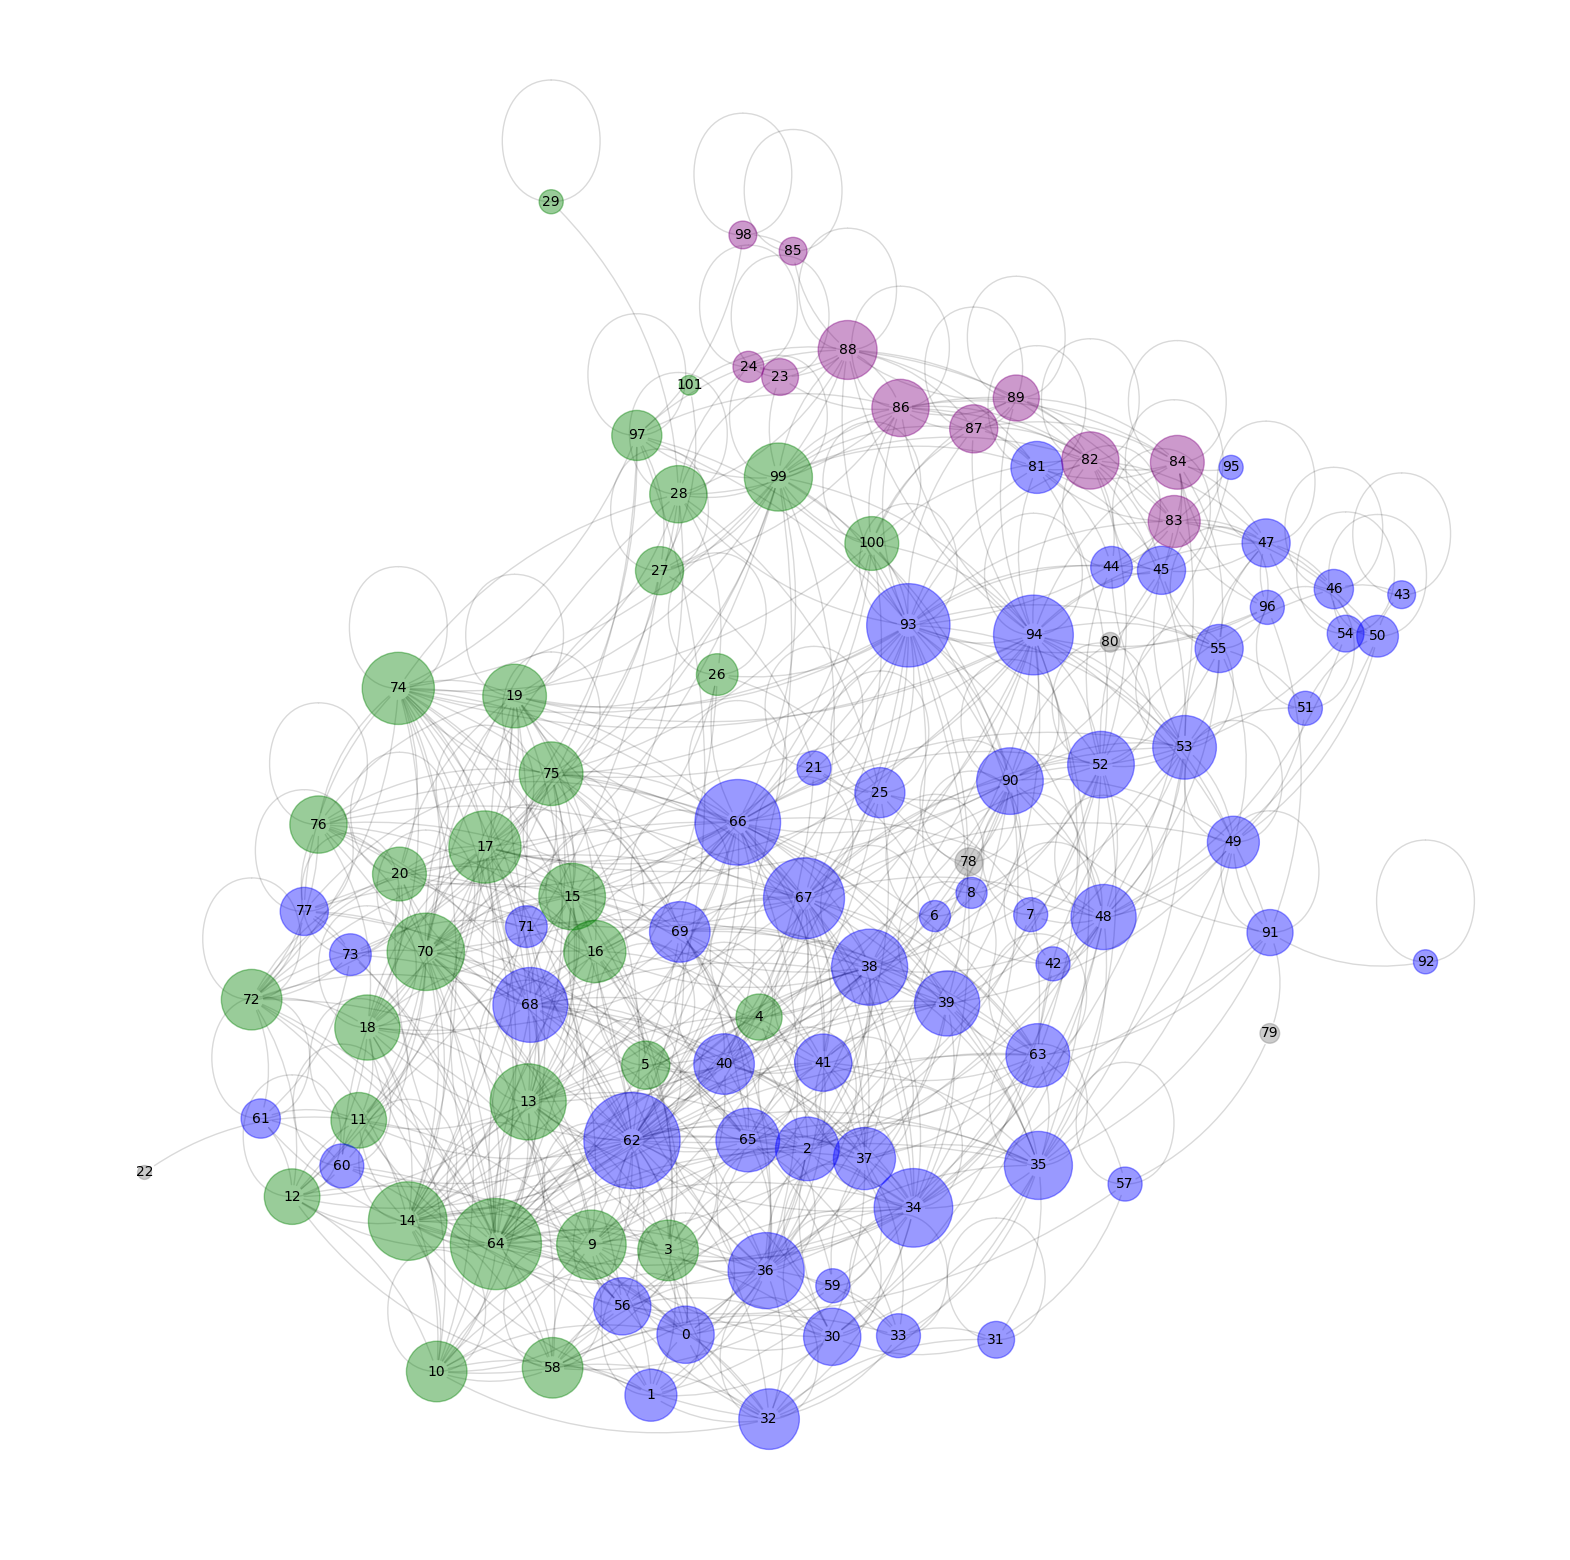

In [57]:
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(G, positions,
                       node_size=[v*100 for v in in_degrees.values()],
                       node_color=node_colors,
                       alpha=0.4,)
nx.draw_networkx_edges(G, positions,
                       connectionstyle="arc3,rad=0.2",
                       edge_color="black",
                       alpha=0.15,
                       arrows=True)
nx.draw_networkx_labels(G, positions, font_size=10, font_family="sans-serif")
plt.axis('off')
plt.show()